# 📊 EDA: Target Distribution Analysis

## Analysis of FPL Points Distribution Across Positions

This notebook analyzes the distribution of target variable (total_points) for each position:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Set styling
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (14, 8)
plt.rcParams['font.size'] = 10

print('✅ Libraries loaded successfully')

✅ Libraries loaded successfully


## Load Data

Auto-detect and load available data files:

In [2]:
import os

data_dir = '/Users/supanut.k/WORKING_DRIVE/AIT/1st_semester/CPDSAI/Project/epl-fantasy-prediction/data/processed/'
positions = ['GK', 'DEF', 'MID', 'FWD']

print('🔍 Checking available files...')

# Try enhanced features first
use_enhanced = True
dfs = {}

for pos in positions:
    enhanced_file = f'{data_dir}{pos}_features_enhanced_safe.csv'
    raw_file = f'{data_dir}{pos}_data.csv'
    
    if os.path.exists(enhanced_file):
        dfs[pos] = pd.read_csv(enhanced_file)
        print(f'  ✅ {pos}: Loaded enhanced ({dfs[pos].shape})')
    elif os.path.exists(raw_file):
        dfs[pos] = pd.read_csv(raw_file)
        print(f'  ✅ {pos}: Loaded raw ({dfs[pos].shape})')
        use_enhanced = False
    else:
        print(f'  ❌ {pos}: No file found')

if not dfs:
    raise FileNotFoundError('❌ No data files found in data/processed/')

# Combine all positions
df = pd.concat(list(dfs.values()), ignore_index=True)

# ✅ FIX: Create 'position' column from 'element_type'
if 'position' not in df.columns and 'element_type' in df.columns:
    position_map = {1: 'GK', 2: 'DEF', 3: 'MID', 4: 'FWD'}
    df['position'] = df['element_type'].map(position_map)
    print('\n✅ Position column created from element_type')

# ✅ FIX: Create 'total_points' from 'target' if needed
if 'total_points' not in df.columns and 'target' in df.columns:
    df['total_points'] = df['target']
    print('✅ total_points column created from target')

print(f'\n📊 Combined data shape: {df.shape}')
print(f'📊 Type: {"Enhanced" if use_enhanced else "Raw"}')
print(f'\nColumns: {df.columns.tolist()[:15]}...')

🔍 Checking available files...
  ✅ GK: Loaded enhanced ((10033, 51))
  ✅ DEF: Loaded enhanced ((30328, 61))
  ✅ MID: Loaded enhanced ((38706, 56))
  ✅ FWD: Loaded enhanced ((11327, 56))

✅ Position column created from element_type
✅ total_points column created from target

📊 Combined data shape: (90394, 68)
📊 Type: Enhanced

Columns: ['season', 'round', 'player_id', 'team', 'opponent_team', 'element_type', 'minutes', 'goals_scored', 'assists', 'bps', 'influence', 'goals_conceded', 'ict_index', 'fdr_attack', 'fdr_defense']...


## Data Overview

In [3]:
print('📋 Dataset Info:')
print(f'  Total records: {len(df):,}')
print(f'  Total features: {len(df.columns)}')
print(f'  Date range: {df["season"].min() if "season" in df.columns else "N/A"} - {df["season"].max() if "season" in df.columns else "N/A"}')

print('\n📍 Position distribution:')
print(df['position'].value_counts().sort_index())

print('\n🎯 Target variable (total_points):')
print(df['total_points'].describe())

📋 Dataset Info:
  Total records: 90,394
  Total features: 68
  Date range: 2021-22 - 2024-25

📍 Position distribution:
position
DEF    30328
FWD    11327
GK     10033
MID    38706
Name: count, dtype: int64

🎯 Target variable (total_points):
count    90394.000000
mean         1.164458
std          2.371971
min         -4.000000
25%          0.000000
50%          0.000000
75%          1.000000
max         26.000000
Name: total_points, dtype: float64


## Target Distribution by Position

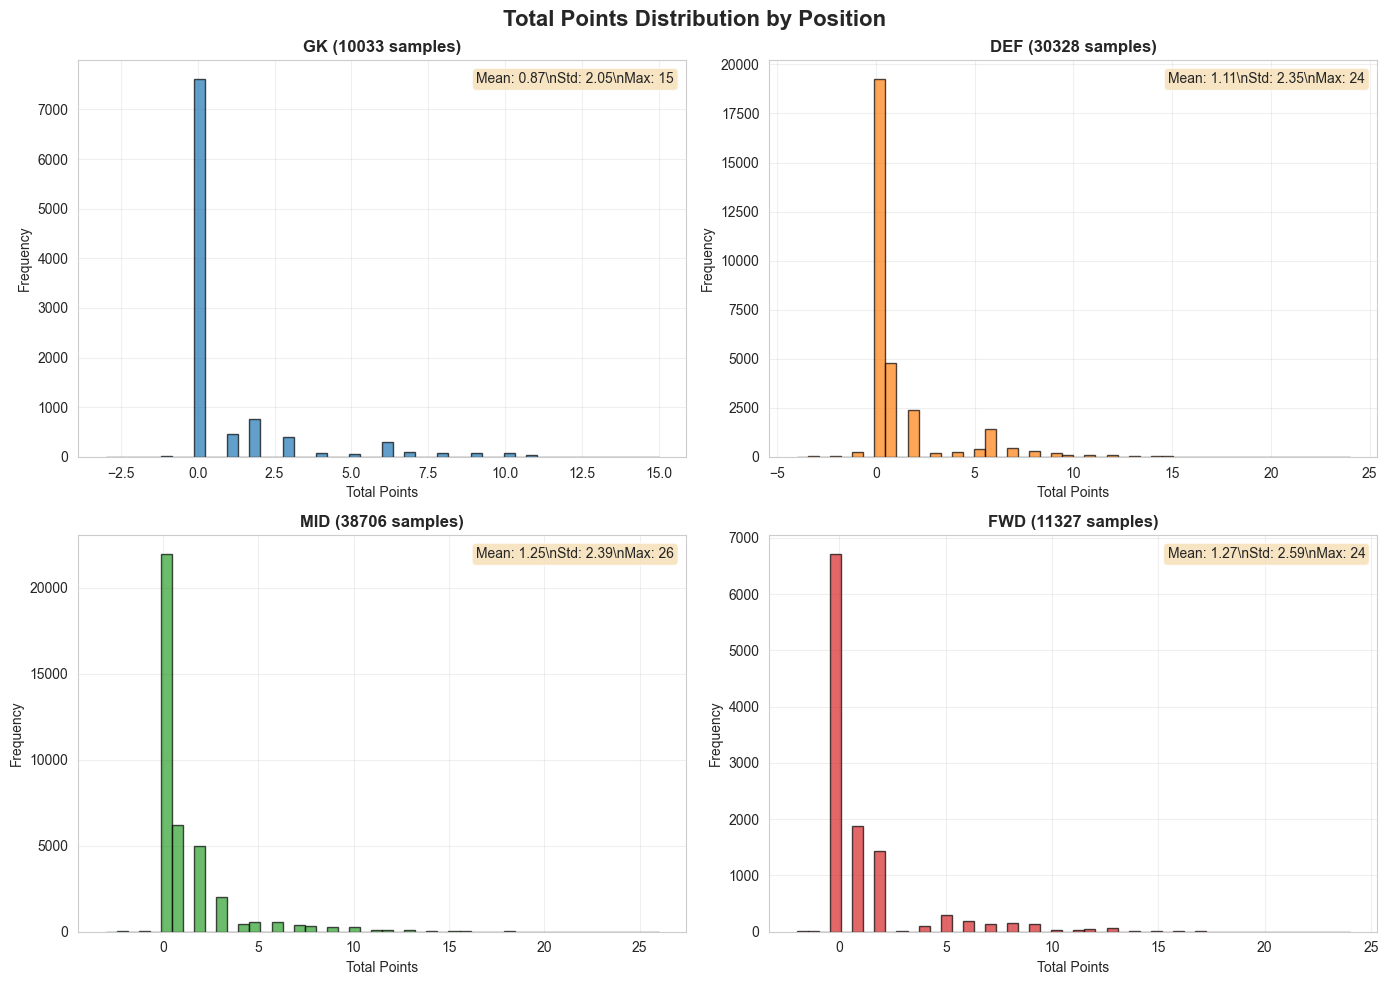

✅ Distribution plotted


In [4]:
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('Total Points Distribution by Position', fontsize=16, fontweight='bold')

for idx, pos in enumerate(positions):
    ax = axes[idx // 2, idx % 2]
    
    pos_data = df[df['position'] == pos]['total_points']
    
    ax.hist(pos_data, bins=50, color=f'C{idx}', alpha=0.7, edgecolor='black')
    ax.set_title(f'{pos} ({len(pos_data)} samples)', fontsize=12, fontweight='bold')
    ax.set_xlabel('Total Points')
    ax.set_ylabel('Frequency')
    ax.grid(True, alpha=0.3)
    
    # Add statistics
    stats_text = f'Mean: {pos_data.mean():.2f}\\nStd: {pos_data.std():.2f}\\nMax: {pos_data.max():.0f}'
    ax.text(0.98, 0.97, stats_text, transform=ax.transAxes, 
            verticalalignment='top', horizontalalignment='right',
            bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8))

plt.tight_layout()
plt.show()

print('✅ Distribution plotted')

## Summary Statistics by Position

In [5]:
summary_stats = df.groupby('position')['total_points'].describe()
print('\n📊 Summary Statistics:')
print(summary_stats.round(2))

# Calculate quartiles
print('\n📈 Quartiles by Position:')
for pos in positions:
    pos_data = df[df['position'] == pos]['total_points']
    q1, q2, q3 = pos_data.quantile([0.25, 0.5, 0.75])
    print(f'  {pos}: Q1={q1:.0f}, Median={q2:.0f}, Q3={q3:.0f}')


📊 Summary Statistics:
            count  mean   std  min  25%  50%  75%   max
position                                               
DEF       30328.0  1.11  2.35 -4.0  0.0  0.0  1.0  24.0
FWD       11327.0  1.27  2.59 -2.0  0.0  0.0  1.0  24.0
GK        10033.0  0.87  2.05 -3.0  0.0  0.0  0.0  15.0
MID       38706.0  1.25  2.39 -3.0  0.0  0.0  2.0  26.0

📈 Quartiles by Position:
  GK: Q1=0, Median=0, Q3=0
  DEF: Q1=0, Median=0, Q3=1
  MID: Q1=0, Median=0, Q3=2
  FWD: Q1=0, Median=0, Q3=1


## Box Plot Comparison

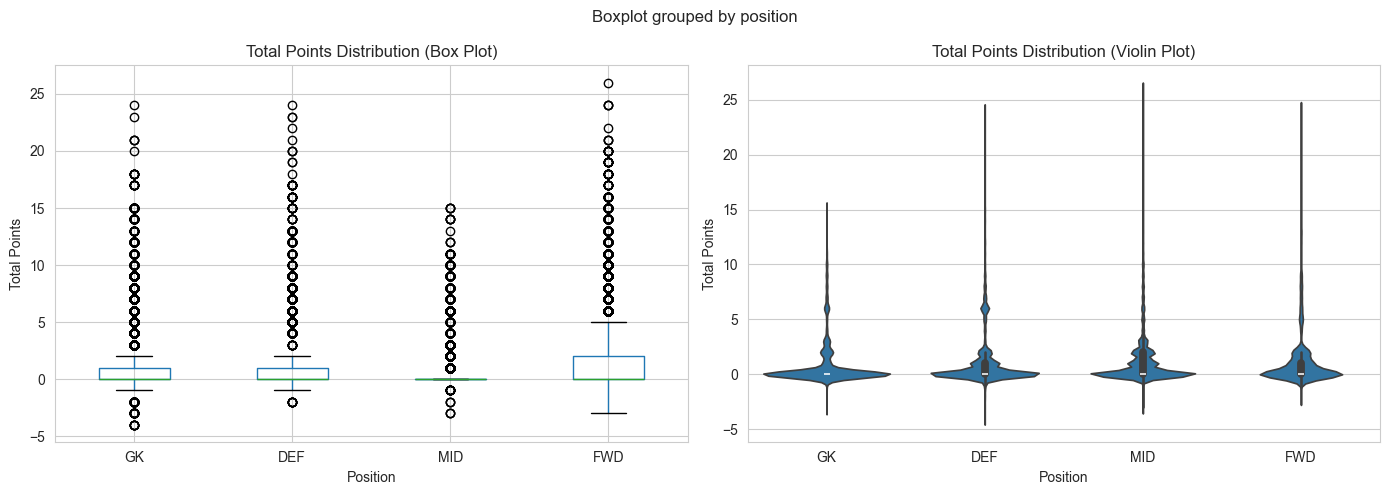

✅ Comparison plots created


In [6]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Box plot
ax1 = axes[0]
df.boxplot(column='total_points', by='position', ax=ax1)
ax1.set_title('Total Points Distribution (Box Plot)')
ax1.set_xlabel('Position')
ax1.set_ylabel('Total Points')
plt.sca(ax1)
plt.xticks(range(1, 5), positions)

# Violin plot
ax2 = axes[1]
sns.violinplot(data=df, x='position', y='total_points', order=positions, ax=ax2)
ax2.set_title('Total Points Distribution (Violin Plot)')
ax2.set_xlabel('Position')
ax2.set_ylabel('Total Points')

plt.tight_layout()
plt.show()

print('✅ Comparison plots created')

## Key Findings

### Summary
1. **GK (Goalkeepers)**: Lowest mean points, high volatility (clean sheets & penalties)
2. **DEF (Defenders)**: Low-moderate points, defensive duty affects scoring
3. **MID (Midfielders)**: Higher points, more balanced scoring opportunities
4. **FWD (Forwards)**: Highest mean points, goal-oriented positions

### Implications for Modeling
- Different models or hyperparameters needed per position
- Normalize within position, not globally
- Use position-specific features and baselines

ฃ